<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Mandatory Assignment <br> (Naive Bayes and KNN)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context attributes
**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

## Table of Content

1. **[Data Preprocessing](#dp)**
2. **[Naive Bayes](#nb)**
3. **[KNN](#nb)**

**Import the required libraries**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#pip install pydotplus
# import the functions for visualizing the decision tree
import pydotplus #If this doesnt work please uncomment first line and rerun
from IPython.display import Image  

import random

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [4]:
# load the csv file
df_bank = pd.read_csv('bank.csv')

# display the first five observations
df_bank.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   32       205         2    999         0      1.100000       93.994000   
1   32       691        10    999         0      1.400000       93.918000   
2   45        45         8    999         0      1.400000       93.444000   
3   33       400         1      5         2     -1.100000       94.601000   
4   47       903         2    999         1     -1.800000       93.075000   

   cons.conf.idx  euribor3m  nr.employed    y  
0     -36.400000   4.858000  5191.000000   no  
1     -42.700000   4.960000  5228.100000  yes  
2     -36.100000   4.963000  5228.100000   no  
3     -49.500000   1.032000  4963.600000  yes  
4     -47.100000   1.415000  5099.100000  yes

In [5]:
# check data types of variables
df_bank.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df_bank.shape

(9640, 11)

In [7]:
X=df_bank.drop(['y'],axis=1)
Y=df_bank['y']

<a id="dp"> </a>
## 1. Data Preprocessing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Remove the outliers (if any).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

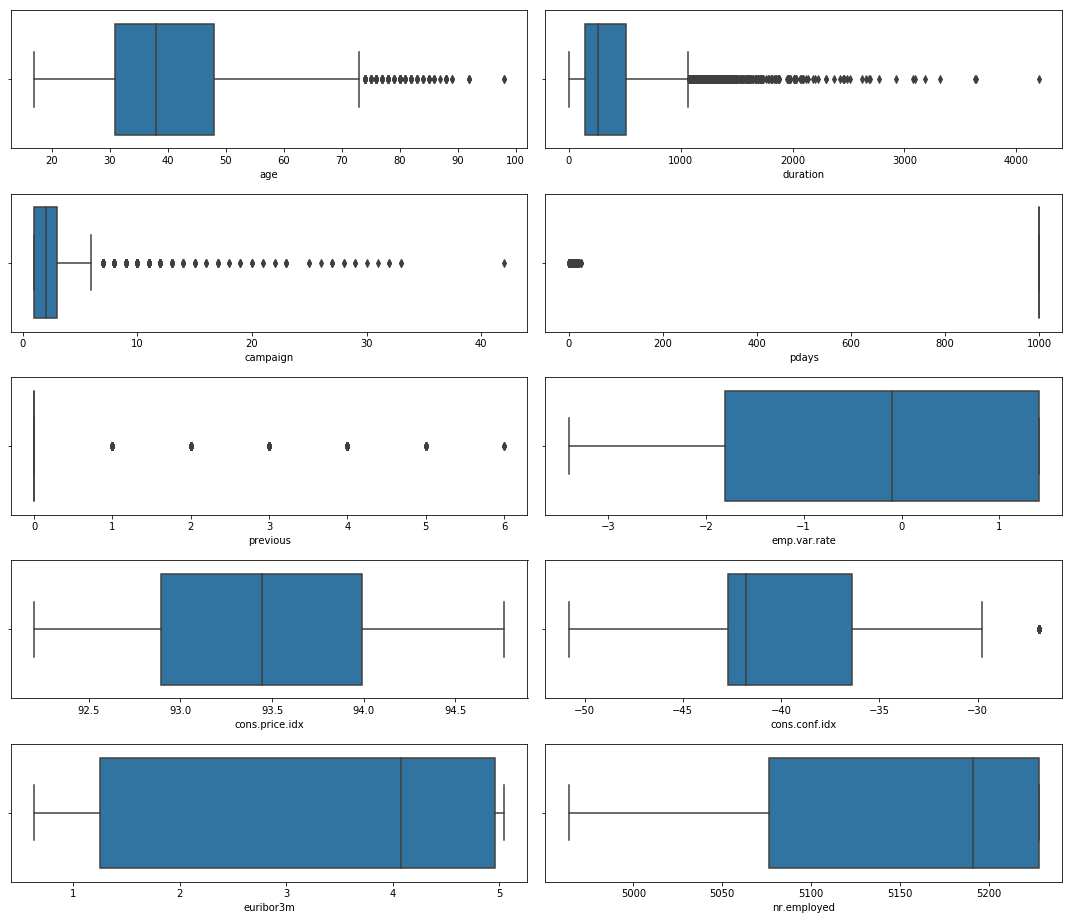

In [8]:
plt.figure(figsize=(15,15))
j=1
for column in X.columns:
    plt.subplot(6,2,j)
    sns.boxplot(x=X[column])
    plt.tight_layout()
    j=j+1

In [9]:
out_col=df_bank[['age','duration','campaign','cons.conf.idx']]

In [10]:
out_col.head()

age  duration  campaign  cons.conf.idx
0   32       205         2     -36.400000
1   32       691        10     -42.700000
2   45        45         8     -36.100000
3   33       400         1     -49.500000
4   47       903         2     -47.100000

In [11]:
for i in out_col.columns:
    q1=out_col[i].quantile(0.25)
    q3=out_col[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=out_col[i].quantile(0.99)
    lc=out_col[i].quantile(0.01)
    for ind1 in out_col[i].index:
        if out_col.loc[ind1, i] >ub:            
            out_col.loc[ind1, i] =uc
        if out_col.loc[ind1, i] < lb:
            out_col.loc[ind1, i] =lc

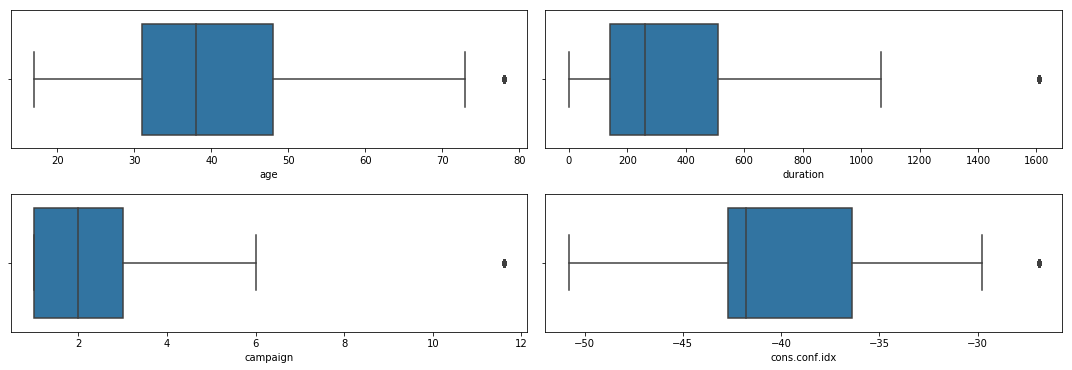

In [12]:
plt.figure(figsize=(15,15))
j=1
for column in out_col.columns:
    plt.subplot(6,2,j)
    sns.boxplot(x=out_col[column])
    plt.tight_layout()
    j=j+1

In [13]:
df_bank['age']=out_col['age']
df_bank['duration']=out_col['duration']
df_bank['campaign']=out_col['campaign']
df_bank['cons.conf.idx']=out_col['cons.conf.idx']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df_bank['y']=df_bank['y'].replace({'no': 1, 'yes': 0})
df_bank.head()

age   duration  campaign  pdays  previous  emp.var.rate  \
0 32.000000 205.000000  2.000000    999         0      1.100000   
1 32.000000 691.000000 11.610000    999         0      1.400000   
2 45.000000  45.000000 11.610000    999         0      1.400000   
3 33.000000 400.000000  1.000000      5         2     -1.100000   
4 47.000000 903.000000  2.000000    999         1     -1.800000   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0       93.994000     -36.400000   4.858000  5191.000000  1  
1       93.918000     -42.700000   4.960000  5228.100000  0  
2       93.444000     -36.100000   4.963000  5228.100000  1  
3       94.601000     -49.500000   1.032000  4963.600000  0  
4       93.075000     -47.100000   1.415000  5099.100000  0

In [15]:
X=df_bank.drop(['y'],axis=1)
Y=df_bank['y']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Replace the value "unknown" from each column with NaN.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
df_bank[df_bank=='unknown']

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0     nan       nan       nan    nan       nan           nan             nan   
1     nan       nan       nan    nan       nan           nan             nan   
2     nan       nan       nan    nan       nan           nan             nan   
3     nan       nan       nan    nan       nan           nan             nan   
4     nan       nan       nan    nan       nan           nan             nan   
5     nan       nan       nan    nan       nan           nan             nan   
6     nan       nan       nan    nan       nan           nan             nan   
7     nan       nan       nan    nan       nan           nan             nan   
8     nan       nan       nan    nan       nan           nan             nan   
9     nan       nan       nan    nan       nan           nan             nan   
10    nan       nan       nan    nan       nan           nan             nan   
11    nan       nan       nan    nan       nan           nan             nan   
12    nan       nan       nan    nan       nan           nan             nan   
13    nan       nan       nan    nan       nan           nan             nan   
14    nan       nan       nan    nan       nan           nan             nan   
15    nan       nan       nan    nan       nan           nan             nan   
16    nan       nan       nan    nan       nan           nan             nan   
17    nan       nan       nan    nan       nan           nan             nan   
18    nan       nan       nan    nan       nan           nan             nan   
19    nan       nan       nan    nan       nan           nan             nan   
20    nan       nan       nan    nan       nan           nan             nan   
21    nan       nan       nan    nan       nan           nan             nan   
22    nan       nan       nan    nan       nan           nan             nan   
23    nan       nan       nan    nan       nan           nan             nan   
24    nan       nan       nan    nan       nan           nan             nan   
25    nan       nan       nan    nan       nan           nan             nan   
26    nan       nan       nan    nan       nan           nan             nan   
27    nan       nan       nan    nan       nan           nan             nan   
28    nan       nan       nan    nan       nan           nan             nan   
29    nan       nan       nan    nan       nan           nan             nan   
30    nan       nan       nan    nan       nan           nan             nan   
31    nan       nan       nan    nan       nan           nan             nan   
32    nan       nan       nan    nan       nan           nan             nan   
33    nan       nan       nan    nan       nan           nan             nan   
34    nan       nan       nan    nan       nan           nan             nan   
35    nan       nan       nan    nan       nan           nan             nan   
36    nan       nan       nan    nan       nan           nan             nan   
37    nan       nan       nan    nan       nan           nan             nan   
38    nan       nan       nan    nan       nan           nan             nan   
39    nan       nan       nan    nan       nan           nan             nan   
40    nan       nan       nan    nan       nan           nan             nan   
41    nan       nan       nan    nan       nan           nan             nan   
42    nan       nan       nan    nan       nan           nan             nan   
43    nan       nan       nan    nan       nan           nan             nan   
44    nan       nan       nan    nan       nan           nan             nan   
45    nan       nan       nan    nan       nan           nan             nan   
46    nan       nan       nan    nan       nan           nan             nan   
47    nan       nan       nan    nan       nan           nan             nan   
48    nan       nan       nan    nan       nan           nan             nan   
49    

There are no columns with 'unknown' as its value. Hence replacement won't be required

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Look for the null values and treat the null values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
df_bank.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Remove the unnecessary variables that will not contribute to the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
num_col=X.select_dtypes(include='number')

In [19]:
while(len(num_col.columns)>0):
    vif=pd.DataFrame()
    vif['features']=num_col.columns
    vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
    vif.set_index(vif['features'],inplace=True)
    vif=vif.drop(['features'],axis=1)
    print(vif)

    if vif['VIF'].max() >5:
        num_col=num_col.drop(vif['VIF'].idxmax(),axis=1)
    else:
        break

print('The Final Features are : ',num_col.columns)   

                        VIF
features                   
age               13.009268
duration           2.107626
campaign           2.167070
pdays             19.751768
previous           2.618088
emp.var.rate      28.393379
cons.price.idx 16817.952302
cons.conf.idx     88.112994
euribor3m        143.568334
nr.employed    20128.556974
                      VIF
features                 
age             13.005273
duration         2.106030
campaign         2.158854
pdays           19.470354
previous         2.599745
emp.var.rate    15.755544
cons.price.idx 203.826116
cons.conf.idx   74.144491
euribor3m       57.560636
                    VIF
features               
age           11.627422
duration       2.094279
campaign       2.146468
pdays         19.136720
previous       2.310901
emp.var.rate   7.793246
cons.conf.idx 28.724335
euribor3m     26.157524
                   VIF
features              
age          11.101742
duration      2.046220
campaign      2.120156
pdays        14.823983


In [20]:
X=df_bank[['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the distribution of all the numeric variables and find the value of skewness for each variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 5 columns):
duration        9640 non-null float64
campaign        9640 non-null float64
pdays           9640 non-null int64
previous        9640 non-null int64
emp.var.rate    9640 non-null float64
dtypes: float64(3), int64(2)
memory usage: 376.6 KB


In [22]:
X['emp.var.rate'].skew()

-0.18123407780163364

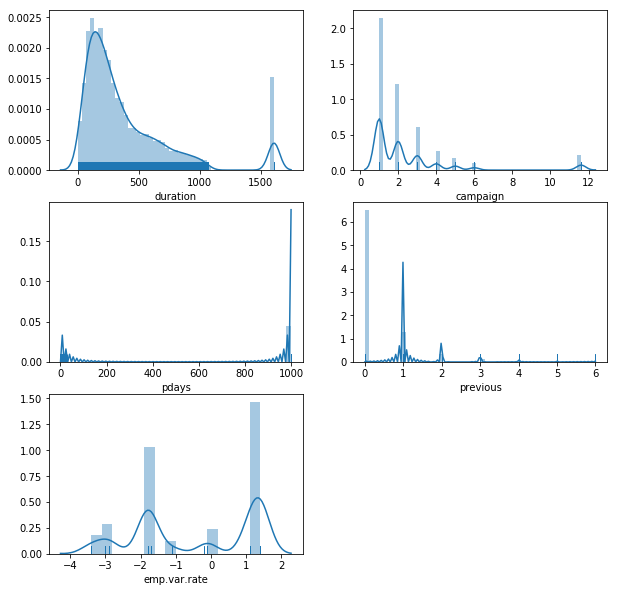

In [23]:
plt.figure(figsize=(10,10))
j=1
for column in X.columns:
    plt.subplot(3,2,j)
    sns.distplot(X[column],kde=True,rug=True)
    j=j+1
    

In [24]:
X['duration'].skew()

1.8862484814019351

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

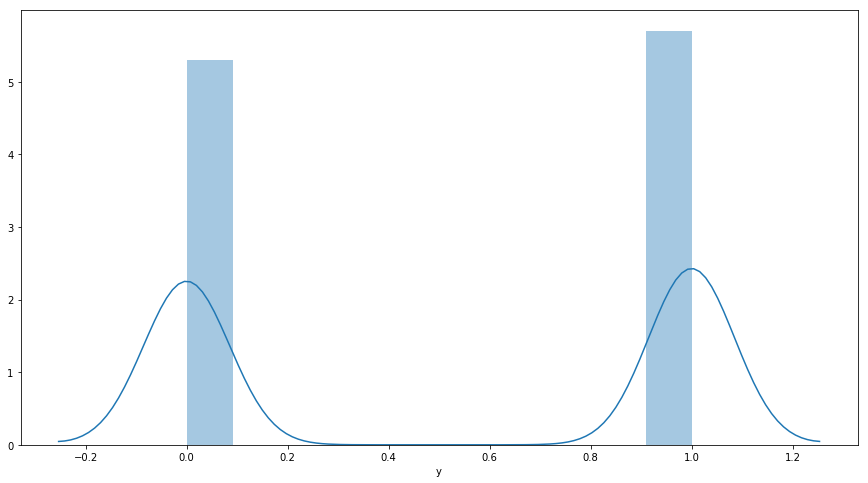

In [25]:
sns.distplot(Y)

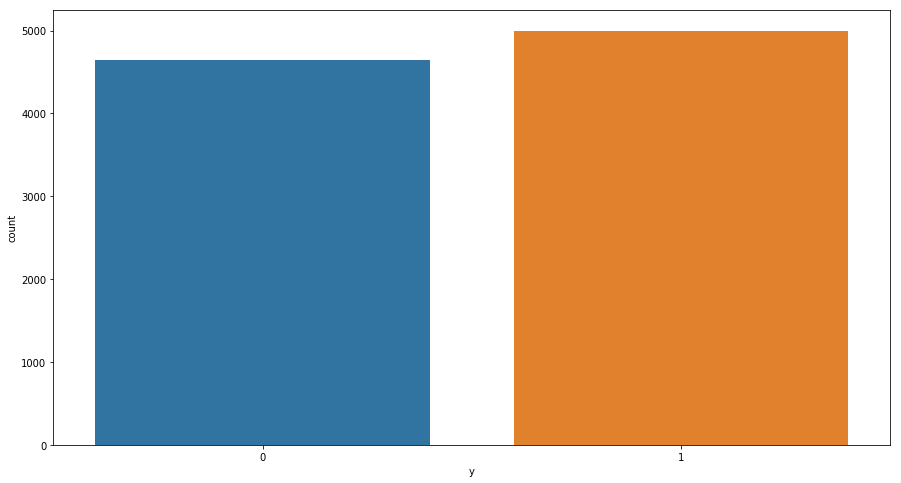

In [26]:
sns.countplot(Y)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
sc=StandardScaler()

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 5 columns):
duration        9640 non-null float64
campaign        9640 non-null float64
pdays           9640 non-null int64
previous        9640 non-null int64
emp.var.rate    9640 non-null float64
dtypes: float64(3), int64(2)
memory usage: 376.6 KB


In [29]:
X_sc=sc.fit_transform(X)
X_sc=pd.DataFrame(X_sc,columns=X.columns,index=X.index)
X_sc.head()

duration  campaign     pdays  previous  emp.var.rate
0 -0.493986 -0.172048  0.345494 -0.447172      0.908285
1  0.809778  3.969077  0.345494 -0.447172      1.082931
2 -0.923208  3.969077  0.345494 -0.447172      1.082931
3  0.029130 -0.602967 -2.897406  2.474374     -0.372451
4  1.378498 -0.172048  0.345494  1.013601     -0.779958

<a id="nb"> </a>
## 2. Naive Bayes

## We shall use the bank marketing dataset that we cleaned above

Before applying classification techniques to predict whether the client subscribed the term deposit or not, let us split the dataset in train and test set.

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X_sc,Y,test_size=0.3,random_state=48)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a function to draw a confusion matrix (heatmap) and a function to plot a roc-auc curve.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
def confusion_mat(model,inp,out):
    plot_confusion_matrix(model,inp,out)
    
def rocauc_curve(df,prediction):
    tpr,fpr,th=roc_curve(df,prediction)
    auc_score=roc_auc_score(df,prediction)
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

    

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a Gaussian naive bayes model and generate a classification report. Also tell how well is the model performing.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
modelGNB=GaussianNB()

In [33]:
modelGNB.fit(xtrain,ytrain)
predGNB=modelGNB.predict(xtest)

In [34]:
print(classification_report(ytest,predGNB))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      1405
           1       0.69      0.92      0.79      1487

    accuracy                           0.74      2892
   macro avg       0.78      0.74      0.73      2892
weighted avg       0.78      0.74      0.74      2892



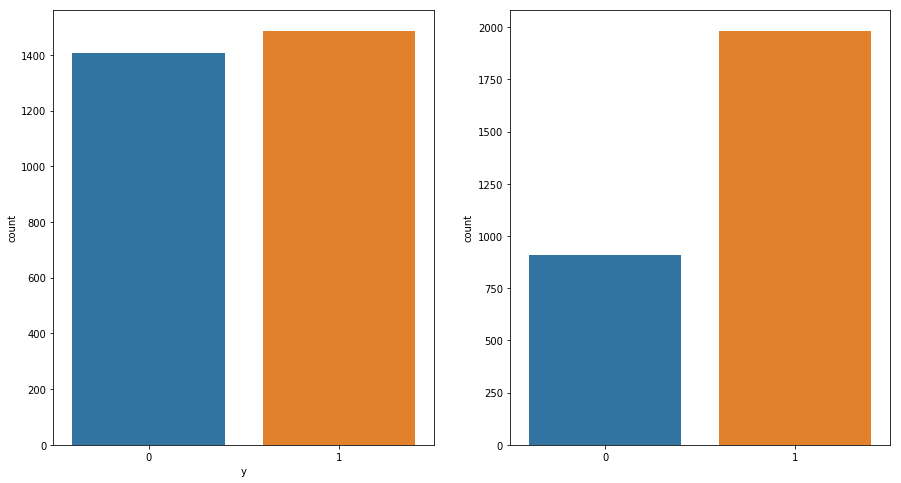

In [35]:
plt.subplot(1,2,1)
sns.countplot(ytest)
plt.subplot(1,2,2)
sns.countplot(predGNB)

Model is predicting High False Positive

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the area under the receiver operating characteristic curve and the confusion matrix for the Naive Bayes model built in question 10.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

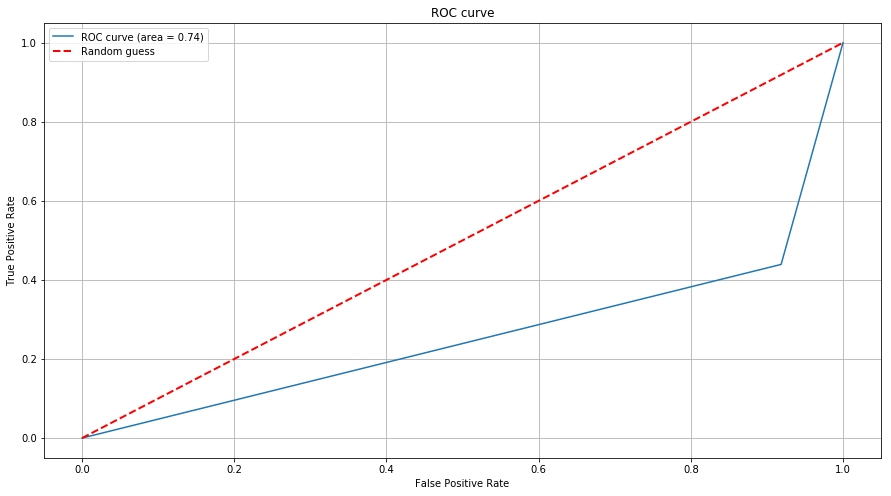

In [36]:
rocauc_curve(ytest,predGNB)

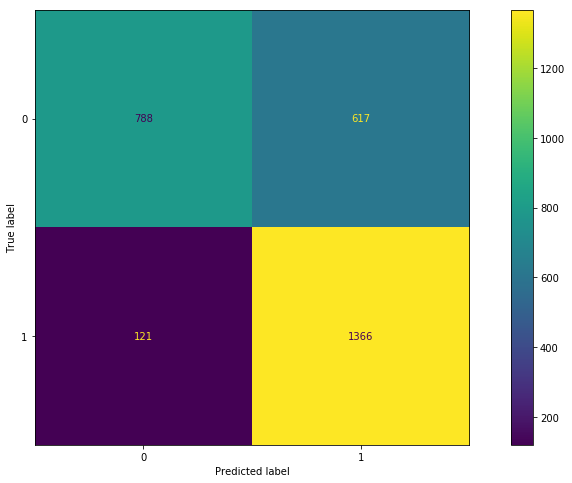

In [37]:
confusion_mat(modelGNB,xtest,ytest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Build a Gaussian Naive Bayes model and perform 10 fold cross validation and find the average accuracy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
cval=cross_val_score(modelGNB,X_sc,Y,cv=10,scoring='accuracy')

In [39]:
np.mean(cval)

0.7261410788381744

In [40]:
np.std(cval)/np.mean(cval)*100

1.9261890046495054

<a id="nb"> </a>
## 3. KNN

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a knn model on a training dataset using euclidean distance to predict whether or not the client subscribed the term deposit. Calculate the accuracy of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
modelKN=KNeighborsClassifier(p=2)
modelKN.fit(xtrain,ytrain)
predKN=modelKN.predict(xtest)

In [42]:
print(accuracy_score(ytest,predKN))

0.8450899031811895


In [43]:
print(classification_report(ytest,predKN))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1405
           1       0.87      0.82      0.84      1487

    accuracy                           0.85      2892
   macro avg       0.85      0.85      0.85      2892
weighted avg       0.85      0.85      0.85      2892



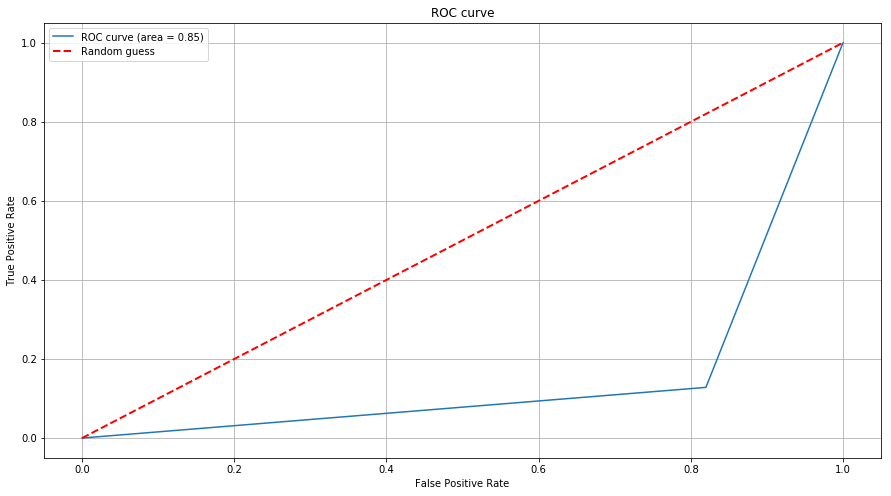

In [44]:
rocauc_curve(ytest,predKN)

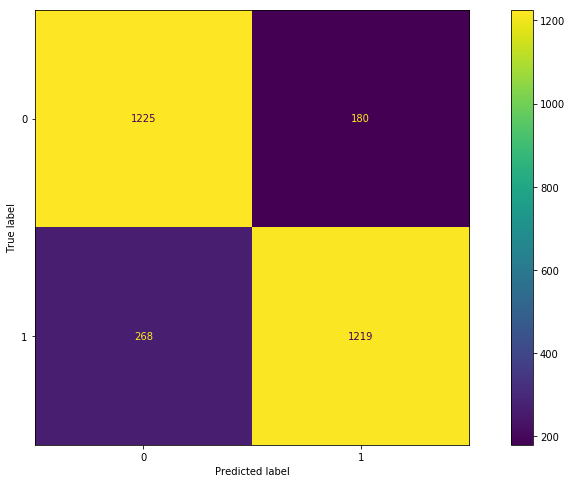

In [45]:
confusion_mat(modelKN,xtest,ytest)

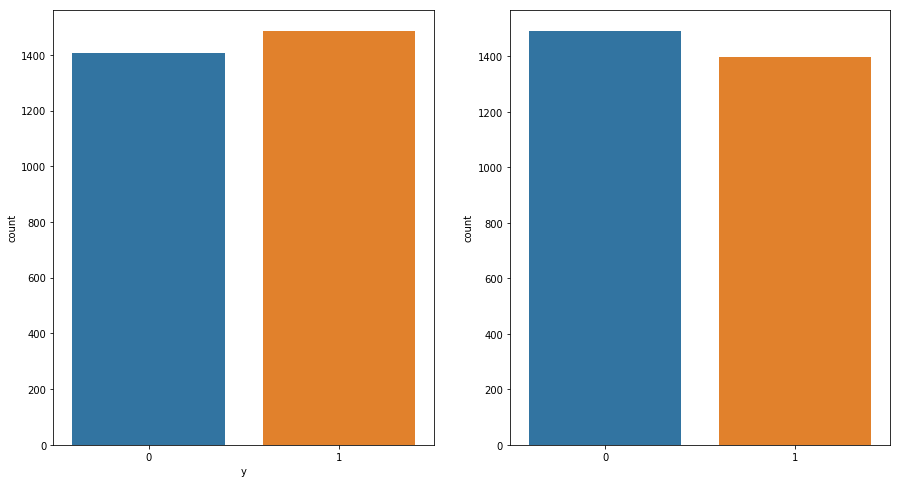

In [46]:
plt.subplot(1,2,1)
sns.countplot(ytest)
plt.subplot(1,2,2)
sns.countplot(predKN)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the optimal value of 'k' in knn with 3 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
me_sc=[]
var_sc=[]
k=np.arange(1,11)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod,X_sc,Y,cv=3,scoring='f1')
    me_sc.append(np.mean(score))
    var_sc.append(np.std(score)/np.mean(score)*100)

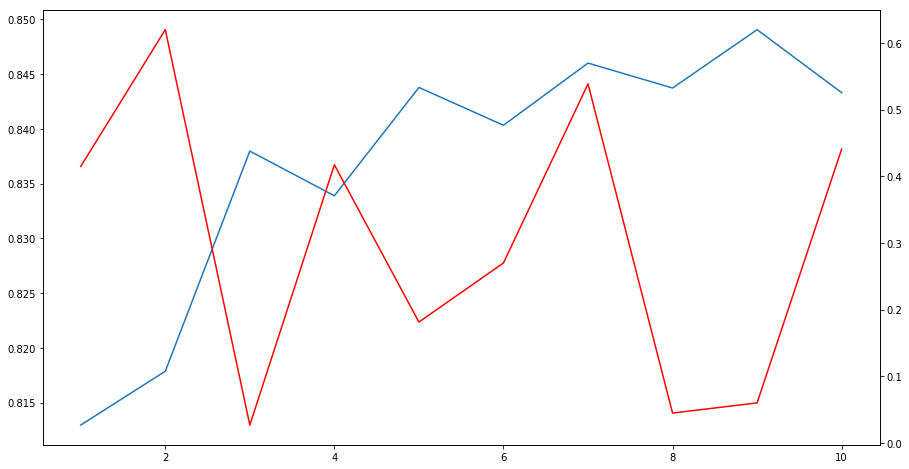

In [48]:
plt.plot(k,me_sc)
plt.twinx()
plt.plot(k,var_sc,color='red')

Optimal value is 3

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15.  Build a KNN model with the best parameters and find the accuracy. Also generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
modelKN=KNeighborsClassifier(n_neighbors=3)
modelKN.fit(xtrain,ytrain)
predKN=modelKN.predict(xtest)

In [50]:
print(classification_report(ytest,predKN))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1405
           1       0.85      0.82      0.84      1487

    accuracy                           0.83      2892
   macro avg       0.83      0.83      0.83      2892
weighted avg       0.83      0.83      0.83      2892



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Find the area under the receiver operating characteristic curve and the confusion matrix for the tuned KNN model built in question 15.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

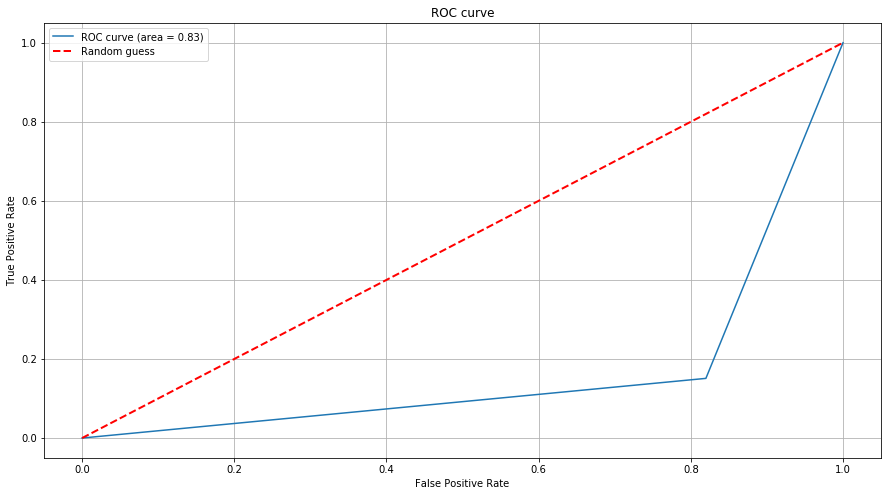

In [51]:
rocauc_curve(ytest,predKN)

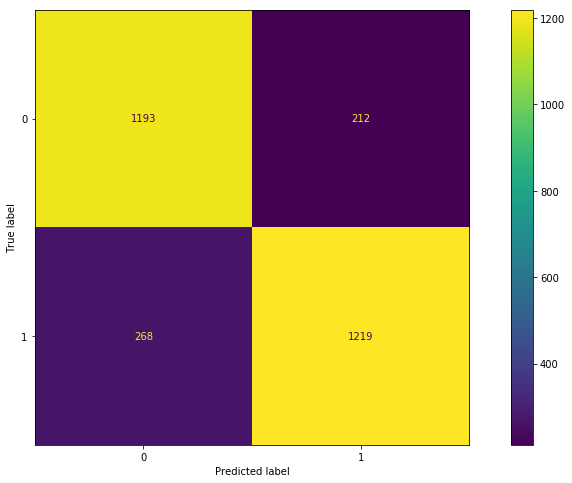

In [52]:
confusion_mat(modelKN,xtest,ytest)

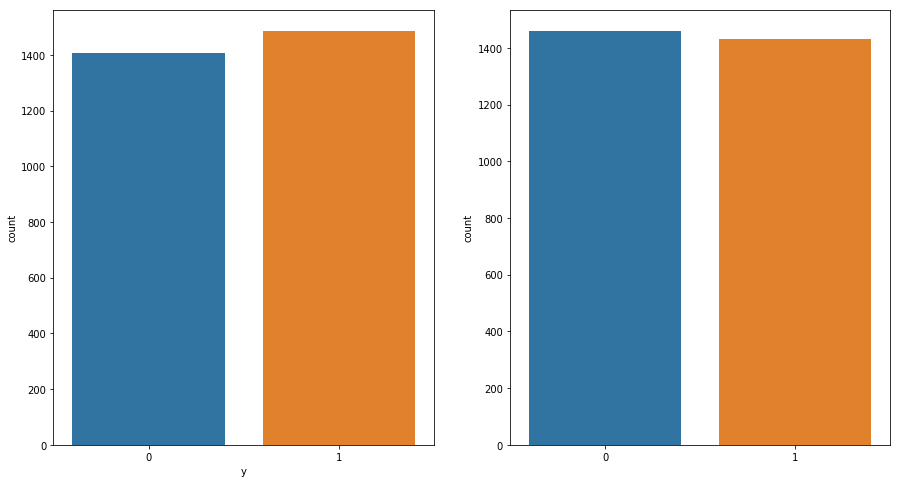

In [53]:
plt.subplot(1,2,1)
sns.countplot(ytest)
plt.subplot(1,2,2)
sns.countplot(predKN)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Calculate the percentage of misclassified and correctly classified observations.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
cm=confusion_matrix(ytest,predKN)

In [55]:
len(ytest)

2892

In [56]:
correct=(cm[0,0]+cm[1,1])/len(ytest)*100
print('Percentage of Correctly Classified elements is:',correct)

Percentage of Correctly Classified elements is: 83.40248962655602


In [57]:
incorrect=(cm[0,1]+cm[1,0])/len(ytest)*100
print('Percentage of Correctly Classified elements is:',incorrect)

Percentage of Correctly Classified elements is: 16.59751037344398


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Compute the accuracy for each value of k and append the value in a list 'accuracy'. Build knn models for distance metric 'euclidean'. Consider only the odd numbers for the 'k' between the range 1 and 25.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

With Cross validation

In [62]:
acc=[]
var_acc=[]
k=np.arange(1,26,2)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod,X_sc,Y,cv=10,scoring='accuracy')
    acc.append(np.mean(score))
    var_acc.append(np.std(score)/np.mean(score)*100)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Draw a line plot to see the accuracy (list created in the above question) for each value of K using euclidean distance as a metric of KNN model and find the optimal value of 'k'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

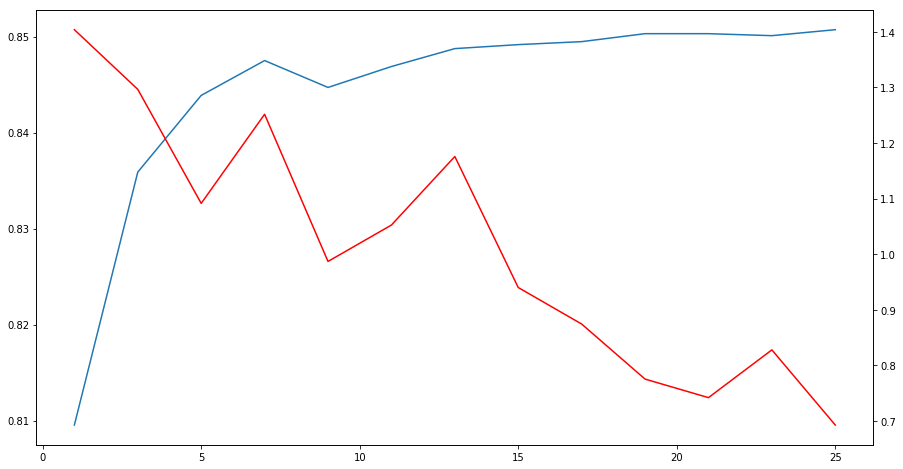

In [63]:
plt.plot(k,acc)
plt.twinx()
plt.plot(k,var_acc,color='red')

Optimal value is 25

# Model

In [64]:
modelKN=KNeighborsClassifier(n_neighbors=25)
modelKN.fit(xtrain,ytrain)
predKN=modelKN.predict(xtest)

In [65]:
print(classification_report(ytest,predKN))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1405
           1       0.88      0.81      0.84      1487

    accuracy                           0.85      2892
   macro avg       0.85      0.85      0.85      2892
weighted avg       0.85      0.85      0.85      2892



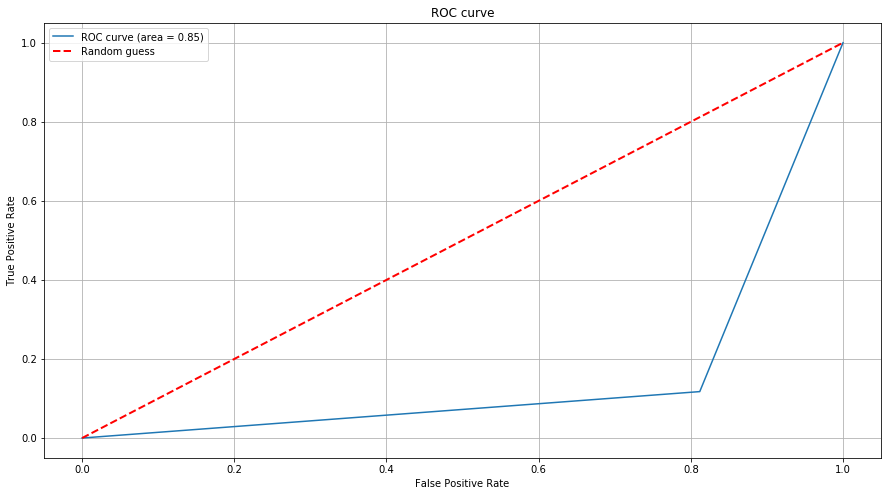

In [66]:
rocauc_curve(ytest,predKN)

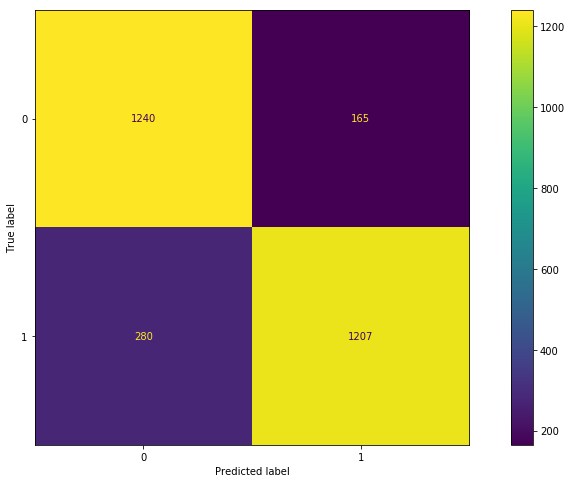

In [67]:
confusion_mat(modelKN,xtest,ytest)

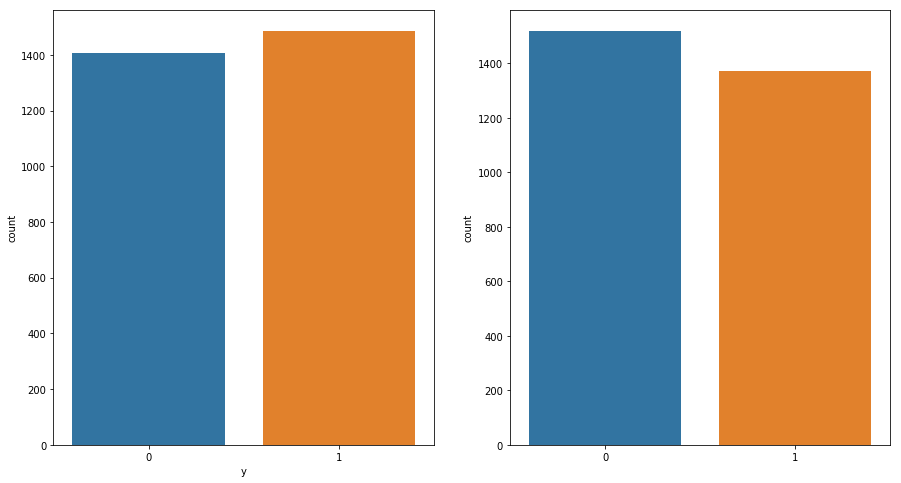

In [68]:
plt.subplot(1,2,1)
sns.countplot(ytest)
plt.subplot(1,2,2)
sns.countplot(predKN)